### 필요한 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth



# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer


# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.5.0 (SDL 2.28.0, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터 불러오기
- 마켓컬리에서 웹크롤링 한 데이터 불러오기

In [4]:
DATA_PATH = r'C:\Users\NT550\asac\eat_the'
import csv
# df = pd.read_csv(r'C:\Users\NT550\asac\eat_the\data_kurly.csv',doublequote=False, escapechar='"', quoting=csv.QUOTE_NONE)
df = pd.read_csv(r'C:\Users\NT550\asac\SIH\SIH\eat_the\data_kurly_sentiment.csv')
df

,Unnamed: 0,ProductCode,MemberGrade,MemberName,ProductName,ReviewText,ReviewDate,ReviewLike,pred_label,pred_score
0,0,1000098225,일반,송**,[아우름] 바다를 품은 톳 해물솥밥키트,간단한 한끼대용으로 좋네요,2023.07.12,0,1,0.970708
1,1,1000098225,일반,봉**,[아우름] 바다를 품은 문어솥밥키트,맛있어서 재구매했어요!,2023.07.12,0,1,0.978758
2,2,1000098225,화이트,최**,[아우름] 바다를 품은 톳 해물솥밥키트,아침대용으로 간단하고좋아요,2023.07.11,0,1,0.949967
3,3,1000098225,라벤더,곽**,[아우름] 바다를 품은 톳 해물솥밥키트,톳좋아해서 주문했어요.,2023.07.11,0,1,0.981879
4,4,1000098225,화이트,김**,[아우름] 바다를 품은 톳 해물솥밥키트,지난 번에 간편하면서도 맛있게 먹어서 또 주문 했습니다.,2023.07.11,0,1,0.993944
...,...,...,...,...,...,...,...,...,...,...
12431,12431,5131430,퍼플,성**,[온하루] 한돈 건나물 솥밥키트,깔끔하고 간편하네요~~,2022.05.14,0,1,0.990196
12432,12432,5131430,더퍼플,최**,[온하루] 한돈 건나물 솥밥키트,연속해서 먹을 정도로 맛잇습니다 . :),2022.05.14,0,1,0.983840
12433,12433,5131430,퍼플,강**,[온하루] 한돈 건나물 솥밥키트,레시피 그대로 하니까 잘 됐어요. 고추지양념 비벼먹으니 더 맛있어요 향도 좋고 정말...,2022.05.14,0,1,0.995536
12434,12434,5131430,더퍼플,최**,[온하루] 한돈 건나물 솥밥키트,또 주문햇어요 재주문을 부르는 맛,2022.05.13,0,1,0.986712


### 제품별로 분류
- 제품별로 분류 후 변수로 저장

In [5]:
df['ProductName'].value_counts()

[콜린스 다이닝] 건강가득 전복솥밥 키트     3532
[치즈룸x테이스팅룸] 전복 솥밥 리조또      2054
[콜린스 다이닝] 미나리 소고기 솥밥 키트    1803
[콜린스 다이닝] 도미 솥밥 키트         1677
[수린] 한우 사골 솥밥 밀키트 (2인분)    1172
[아우름] 바다를 품은 문어솥밥키트         785
[아우름] 바다를 품은 톳 해물솥밥키트       422
[온하루] 한돈 건나물 솥밥키트           339
[온하루] 구운 생선 솥밥키트            268
[콜린스 다이닝] 한돈 가지 솥밥 키트       217
[온하루] 구운 삼치 솥밥키트            167
Name: ProductName, dtype: int64

In [6]:
df_one = df[df['ProductName'] == '[콜린스 다이닝] 건강가득 전복솥밥 키트']
df_two = df[df['ProductName'] == '[치즈룸x테이스팅룸] 전복 솥밥 리조또']
df_three = df[df['ProductName'] == '[콜린스 다이닝] 미나리 소고기 솥밥 키트']
df_four = df[df['ProductName'] == '[콜린스 다이닝] 도미 솥밥 키트']
df_five = df[df['ProductName'] == '[수린] 한우 사골 솥밥 밀키트 (2인분)']
df_six = df[df['ProductName'] == '[아우름] 바다를 품은 문어솥밥키트']
df_seven = df[df['ProductName'] == '[아우름] 바다를 품은 톳 해물솥밥키트']
df_eight = df[df['ProductName'] == '[온하루] 한돈 건나물 솥밥키트']
df_nine = df[df['ProductName'] == '[온하루] 구운 생선 솥밥키트']
df_ten = df[df['ProductName'] == '[콜린스 다이닝] 한돈 가지 솥밥 키트']
df_eleven = df[df['ProductName'] == '[온하루] 구운 삼치 솥밥키트']

In [21]:
df_ten['ReviewDate']

6793    2023.01.06
6794    2023.07.12
6795    2023.07.12
6796    2023.07.11
6797    2023.07.11
           ...    
7005    2023.01.07
7006    2023.01.07
7007    2023.01.06
7008    2023.01.06
7009    2023.01.06
Name: ReviewDate, Length: 217, dtype: object

### 전체 데이터와 제품별로 토큰화 진행!!!
- ex) df_one => [콜린스 다이닝] 건강가득 전복솥밥 키트에 대한 토큰화 진행

In [5]:
# 문자열 아닌 데이터 모두 제거
df_review = [review for review in df['ReviewText'] if type(review) is str]
df_one_review = [review for review in df_one['ReviewText'] if type(review) is str]
df_two_review = [review for review in df_two['ReviewText'] if type(review) is str]
df_three_review = [review for review in df_three['ReviewText'] if type(review) is str]
df_four_review = [review for review in df_four['ReviewText'] if type(review) is str]
df_five_review = [review for review in df_five['ReviewText'] if type(review) is str]
df_six_review = [review for review in df_six['ReviewText'] if type(review) is str]
df_seven_review = [review for review in df_seven['ReviewText'] if type(review) is str]
df_eight_review = [review for review in df_eight['ReviewText'] if type(review) is str]
df_nine_review = [review for review in df_nine['ReviewText'] if type(review) is str]
df_ten_review = [review for review in df_ten['ReviewText'] if type(review) is str]
df_eleven_review = [review for review in df_eleven['ReviewText'] if type(review) is str]
df_one_review

['맛있어요! 첨엔 좀 비싸다 생각했지만 전복솥밥 만들어먹으니 넘 편하고 전복세개 든거랑 육수맛 보고나니오히려 가성비 키트라는 생각이 드네요. 강추! 특히 조선향미 쌀의 구수한 맛과 찰진식감이 넘나 잘어울려요~♡♡ 3인용 무쎄 무쇠솥에 딱 지어먹으니 꿀맛! 너무 맛있어서 눈물날뻔! 양념간장 필요없이 간간한 맛 좋구요 (평소 간센거 좋아하심 다시마간장 같은거 조금 곁들이셔도 굿!) 들기름 한바퀴 두르니 또다른맛! 마무리 누룽지까지! 남편행복~♡ 평소 소식하던 공기로 세그릇 드시고 저를보고 배를 내밀며 책임지라시네요. ㅋ 어쩌라구요, 솥밥이 넘 맛난걸~~^^ 정말 오랜만에 맛난밥 먹게해주신 무쇠솥업체, 쌀생산 농부님, 콜린스 다이닝과 컬리 엠디분, 정말정말 감사합니다! 전복솥밥은 사랑입니당~~💕 💜 ',
 '도미솥밥 맛있게 잘 먹어서 믿고 전복도 구매해봤는데 역시 잘한 선택 같아요!!  정말 쉽게 그럴듯한 영양식을 만들었어요 남편 생일이라 생일상 차려주려는데 애들 데리고 이거저것 하는게 쉽지않아 컬리 도움받아 간단하지만 쉽게 그럴듯한 생일상을 차렸어요  일단 도미솥밥보다 육수는 적었지만 일반 전기밥솥 2컵 정도 분량에 딱 맞는 양이었고 육수에 전복이 같이 들어 있어서 별도로 손질하고 그런게 없어 아주 간편했어요 간은 따로 안해도 맛있게 먹을 정도였는데 간장양념이랑 같이 먹어도 좋을 듯해요  그냥 쌀 씻고 육수 붓고 취사하면 끝이라 간단하고 생각보다 전복도 부들부들 맛있고 버섯이랑 은행도 들어있어 따로 재료 추가하지 않아도 뭔가 신경쓴 것 같은 느낌이에요  콜린스제품 괜찮아서 하나 하나 구매해보고 있는데 만족스럽습니다. 이런 가성비 좋고 맛도 좋은 제품 많아지면 좋겠어요.  그리고 이번에 생일상 준비하면서 컬리에 파티음식 조합 같은거 추천해주는 카테고리도 있음 좋겠다는 생각이 들었네요.',
 '가을이 되니까 TV에서 전복솥밥을 먹는 장면이 많이 나오더라구요 맛있게 먹는 걸 보면서 집에서 한 번 해볼까 싶다가도 먹는 양에 비해 재료 이것저것 사는 수고로움이 더 클 것

In [6]:
# 한글 외의 모든 글자를 제거한다.
# 한글 정규식을 이용하여 한글 외의 모든 글자를 제거한다.

import re

def text_clearing(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result


In [7]:
# 함수 적용 

df["ko_review"] = df["ReviewText"].apply(lambda x : text_clearing(x))
df_one["ko_review"] = df_one["ReviewText"].apply(lambda x : text_clearing(x))
df_two["ko_review"] = df_two["ReviewText"].apply(lambda x : text_clearing(x))
df_three["ko_review"] = df_three["ReviewText"].apply(lambda x : text_clearing(x))
df_four["ko_review"] = df_four["ReviewText"].apply(lambda x : text_clearing(x))
df_five["ko_review"] = df_five["ReviewText"].apply(lambda x : text_clearing(x))
df_six["ko_review"] = df_six["ReviewText"].apply(lambda x : text_clearing(x))
df_seven["ko_review"] = df_seven["ReviewText"].apply(lambda x : text_clearing(x))
df_eight["ko_review"] = df_eight["ReviewText"].apply(lambda x : text_clearing(x))
df_nine["ko_review"] = df_nine["ReviewText"].apply(lambda x : text_clearing(x))
df_ten["ko_review"] = df_ten["ReviewText"].apply(lambda x : text_clearing(x))
df_eleven["ko_review"] = df_eleven["ReviewText"].apply(lambda x : text_clearing(x))

In [8]:
# konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출한다.
def get_pos (x) :
    tagger = Okt()
    pos = tagger.pos(x)
    
    # 단어와 품사를 합쳐서 하나의 단어로 만들어준다.
    result = []
    
    # 형태소의 수만큼 반복한다.
    # 조사인 것과 명사인 것이 같을 수 있기 때문에 구분해준다.
    # 형태소 벡터를 만들때 추후 사용
    for a1 in pos :
        result.append(f'{a1[0]}/{a1[1]}')
    
    return result

In [9]:
# 형태소 추출
index_vectorizer = CountVectorizer(tokenizer=lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df_three["ko_review"].tolist())
X

<1803x4042 sparse matrix of type '<class 'numpy.int64'>'
	with 21383 stored elements in Compressed Sparse Row format>

In [10]:
# 형태소 벡터 생성
index_vectorizer.vocabulary_

{'솥밥/Noun': 2145,
 '항상/Noun': 3890,
 '궁금했는데/Adjective': 359,
 '키트/Noun': 3633,
 '가/Josa': 40,
 '있어서/Adjective': 3027,
 '편하고/Adjective': 3711,
 '맛/Noun': 1298,
 '잇게/Verb': 2983,
 '햇/Noun': 3958,
 '어/Suffix': 2557,
 '용/Noun': 2792,
 '좋네요/Adjective': 3273,
 '밥/Noun': 1663,
 '도/Josa': 903,
 '나/Josa': 542,
 '지고/Noun': 3402,
 '하지만/Conjunction': 3843,
 '고기/Noun': 259,
 '부족해요/Adjective': 1850,
 '까지/Josa': 498,
 '나오는지/Verb': 575,
 '몰랐는데/Verb': 1563,
 '만들기/Noun': 1230,
 '너무/Adverb': 657,
 '쉽고/Verb': 2182,
 '콜린스/Noun': 3618,
 '란/Noun': 1159,
 '브랜드/Noun': 1886,
 '신뢰/Noun': 2249,
 '가서/Verb': 61,
 '다른/Noun': 797,
 '좋은/Adjective': 3329,
 '제품/Noun': 3215,
 '들/Suffix': 1044,
 '더/Noun': 875,
 '많이/Adverb': 1286,
 '나오면/Verb': 578,
 '좋겠어요/Adjective': 3264,
 '간편하고/Adjective': 103,
 '맛있어서/Adjective': 1353,
 '자주/Noun': 3059,
 '구매/Noun': 331,
 '합니다/Verb': 3883,
 '간단히/Adjective': 94,
 '할/Verb': 3866,
 '수/Noun': 2153,
 '있어/Adjective': 3024,
 '편해요/Adjective': 3721,
 '최고/Noun': 3572,
 '아이/Noun': 2430,
 '좋아해서/Adjec

### 단어 빈도수 파악
- 각 단어마다 빈도수 매핑

In [11]:
# CountVectorizer로 생성한 형태소 벡터에서 단어 빈도수를 계산
word_frequencies = X.sum(axis=0)

# 각 단어와 빈도수를 매핑하는 딕셔너리 생성
word_frequency_dict = {}
for word, index in index_vectorizer.vocabulary_.items():
    word_frequency_dict[word] = word_frequencies[0, index]

# 빈도수가 큰 순서대로 정렬된 딕셔너리 생성
sorted_word_frequency_dict = dict(sorted(word_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# 결과 출력
for word, frequency in sorted_word_frequency_dict.items():
    print(f"{word}: {frequency}")


미나리/Noun: 534
에/Josa: 404
이/Josa: 371
가/Josa: 361
도/Josa: 323
맛/Noun: 285
솥밥/Noun: 276
밥/Noun: 251
맛있어요/Adjective: 246
는/Josa: 206
은/Josa: 190
더/Noun: 184
너무/Adverb: 182
좋아요/Adjective: 182
구매/Noun: 168
을/Josa: 166
좀/Noun: 162
잘/Verb: 156
고기/Noun: 155
먹었어요/Verb: 149
소고기/Noun: 141
요/Josa: 138
해서/Verb: 134
로/Josa: 118
맛있게/Adjective: 116
한/Determiner: 116
으로/Josa: 113
재구매/Verb: 107
키트/Noun: 106
쌀/Noun: 106
해/Noun: 106
했어요/Verb: 104
했는데/Verb: 104
같아요/Adjective: 102
먹기/Noun: 99
육수/Noun: 98
향/Noun: 96
끼/Noun: 94
때/Noun: 94
추가/Noun: 91
후기/Noun: 84
그냥/Noun: 83
양/Noun: 79
간편하고/Adjective: 77
넣고/Verb: 77
만/Josa: 76
조금/Noun: 75
주문/Noun: 68
저/Noun: 67
간편하게/Adjective: 66
들/Suffix: 65
넘/Verb: 65
를/Josa: 65
보다/Josa: 64
다/Adverb: 64
맛있어서/Adjective: 63
것/Noun: 63
생각/Noun: 62
안/VerbPrefix: 61
ㅎㅎ/KoreanParticle: 60
합니다/Verb: 59
잘/VerbPrefix: 59
같이/Adverb: 59
맛있네요/Adjective: 56
서/Josa: 56
거/Noun: 56
수/Noun: 55
할/Verb: 54
먹어/Verb: 54
아이/Noun: 53
간장/Noun: 53
먹었습니다/Verb: 52
간이/Noun: 52
좋네요/Adjective: 51
이/Dete

In [12]:
# 딕셔너리를 DataFrame으로 변환합니다.
df = pd.DataFrame(list(sorted_word_frequency_dict.items()), columns=['Top Nouns', '빈도수'])

# DataFrame을 출력합니다.
df

,Top Nouns,빈도수
0,미나리/Noun,534
1,에/Josa,404
2,이/Josa,371
3,가/Josa,361
4,도/Josa,323
...,...,...
4037,괜찮았나/Adjective,1
4038,수향/Noun,1
4039,묻혀/Verb,1
4040,나지도/Verb,1


In [13]:
# TFidf 변환 모델 생성
tfidf_vectorizer = TfidfTransformer()
# 형태소 벡터 변환하기
X = tfidf_vectorizer.fit_transform(X)
print(X[0])

  (0, 3958)	0.3537408111730138
  (0, 3890)	0.3401721017753926
  (0, 3711)	0.26684569943305786
  (0, 3633)	0.20962755810851838
  (0, 3027)	0.2638454293461136
  (0, 2983)	0.38395500958874995
  (0, 2792)	0.3163171235354467
  (0, 2557)	0.27889343589787957
  (0, 2145)	0.15962419897856706
  (0, 1298)	0.15673849862918549
  (0, 359)	0.4213786972263171
  (0, 40)	0.14669444341176668


## 학습 데이터 생성
- 데이터 프레임의 y행을 시리즈로 저장

In [14]:
y = df_three['pred_label']

### 오버샘플링 진행
- 데이터 불균형으로 인한 오버샘플링 진행

In [15]:
from imblearn.over_sampling import SMOTE
# SMOTE 객체 생성
smote = SMOTE(sampling_strategy='auto')  # sampling_strategy는 샘플링 비율을 지정합니다. 'auto'로 설정하면 클래스의 빈도에 따라 자동으로 결정됩니다.

# 오버샘플링 수행
X_resampled, y_resampled = smote.fit_resample(X, y)

# 오버샘플링 후의 데이터 확인
print("샘플링 전 라벨 0의 수:", sum(y == 0))
print("샘플링 전 라벨 1의 수:", sum(y == 1))
print("샘플링 후 라벨 0의 수:", sum(y_resampled == 0))
print("샘플링 후 라벨 1의 수:", sum(y_resampled == 1))

샘플링 전 라벨 0의 수: 293
샘플링 전 라벨 1의 수: 1510
샘플링 후 라벨 0의 수: 1510
샘플링 후 라벨 1의 수: 1510


In [16]:
# 데이터를 훈련 세트와 테스트 세트로 나눔 (테스트 세트의 비율은 20%로 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 최적의 학습 데이터를 선정하기 위해서 KNN, 로지스틱 회귀의 하이퍼 파라미터를 구한다.

# KNN
params = {
	"n_neighbors" : list(range(1, 11))
}

# 사용할 모델 객체 생성
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다. 
kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
grid_clf1 = GridSearchCV(model1, param_grid = params, scoring="f1", cv=kfold)
grid_clf1.fit(X_train, y_train)

# 결과 출력
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'n_neighbors': 4}
최적의 모델 평균 성능 : 0.9321286772313563


In [18]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()

grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='f1', cv=kfold)
grid_clf2.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.9428970128583879


### 테스트 성능 비교
- knn보다 LogisticRegression이 성능이 더 좋기 때문에 LogisticRegression 모델로 선정

In [19]:
# 테스트 세트를 사용하여 모델 평가

test_score_1 = grid_clf1.score(X_test, y_test)
print(f"테스트 세트 성능: {test_score_1}")

test_score_2 = grid_clf2.score(X_test, y_test)
print(f"테스트 세트 성능: {test_score_2}")



테스트 세트 성능: 0.9254658385093167
테스트 세트 성능: 0.9470304975922954


In [20]:
model = grid_clf2.best_estimator_

# 모델의 가중치 구하기
# 모델의 가중치를 나타낼 때는 coef_라는 용어를 사용함.
# 이 값은 모델이 입력 특성들과 결과값 사이의 관계를 학습하는데 사용
a1 = (model.coef_[0])
display(a1)
len(a1)

array([11.6107545 ,  3.81381316,  1.33596693, ...,  2.28031587,
       -7.64118524,  0.        ])

4042

In [21]:
# 해당 상관계수에 순차적으로 번호를 붙인 튜플 형태로 만들기 위해 enumerate 함수를 사용!!
a2 = list(enumerate(a1))
a2

[(0, 11.61075449729944),
 (1, 3.8138131594578537),
 (2, 1.3359669319263998),
 (3, -29.56690133424659),
 (4, 1.9519120147631221),
 (5, 2.3221477862844737),
 (6, -15.524617945552857),
 (7, 2.8416737136092243),
 (8, 0.0),
 (9, 2.020141459946101),
 (10, 1.828168410590133),
 (11, 1.462786179719289),
 (12, -10.945738579362947),
 (13, 6.466306086469709),
 (14, 8.935766473168432),
 (15, 4.217179968100151),
 (16, 0.0),
 (17, 2.1800588501717333),
 (18, 30.67448160193529),
 (19, 0.0),
 (20, 35.10031962051591),
 (21, 21.36734544490085),
 (22, 0.8566729207524342),
 (23, 2.904484928002642),
 (24, 3.915758381208375),
 (25, 2.094434386860043),
 (26, 0.0),
 (27, -5.17206054489313),
 (28, 2.2120869844547264),
 (29, -9.282121727358591),
 (30, -26.725888101361324),
 (31, -32.31801721199679),
 (32, 0.0),
 (33, 0.0),
 (34, -81.18252973836495),
 (35, 0.9036176381904993),
 (36, -80.69334635819538),
 (37, -14.94838315340843),
 (38, -17.275755409592886),
 (39, 7.969553089380748),
 (40, -36.95975951705662),
 (41

In [22]:
# sorting 작업을 하기 위해서 인덱스에 있는 값을 계수로, 계수에 있는 값을 인덱스로 변경
a3 = []

for idx, value in a2 : 
	a3.append((value, idx))
    
a3

[(11.61075449729944, 0),
 (3.8138131594578537, 1),
 (1.3359669319263998, 2),
 (-29.56690133424659, 3),
 (1.9519120147631221, 4),
 (2.3221477862844737, 5),
 (-15.524617945552857, 6),
 (2.8416737136092243, 7),
 (0.0, 8),
 (2.020141459946101, 9),
 (1.828168410590133, 10),
 (1.462786179719289, 11),
 (-10.945738579362947, 12),
 (6.466306086469709, 13),
 (8.935766473168432, 14),
 (4.217179968100151, 15),
 (0.0, 16),
 (2.1800588501717333, 17),
 (30.67448160193529, 18),
 (0.0, 19),
 (35.10031962051591, 20),
 (21.36734544490085, 21),
 (0.8566729207524342, 22),
 (2.904484928002642, 23),
 (3.915758381208375, 24),
 (2.094434386860043, 25),
 (0.0, 26),
 (-5.17206054489313, 27),
 (2.2120869844547264, 28),
 (-9.282121727358591, 29),
 (-26.725888101361324, 30),
 (-32.31801721199679, 31),
 (0.0, 32),
 (0.0, 33),
 (-81.18252973836495, 34),
 (0.9036176381904993, 35),
 (-80.69334635819538, 36),
 (-14.94838315340843, 37),
 (-17.275755409592886, 38),
 (7.969553089380748, 39),
 (-36.95975951705662, 40),
 (-1

In [23]:
# 상관계수를 기준으로 내림차순 정렬
coef_pos_index = sorted(a3, reverse=True)
coef_pos_index

[(205.96743497519205, 1355),
 (124.17673975656369, 3285),
 (97.05967771425581, 3977),
 (96.65005661231024, 103),
 (88.21450107007288, 331),
 (87.7034696507728, 538),
 (65.57824900678327, 102),
 (63.48500921893745, 1314),
 (61.3557648025563, 1475),
 (57.69416410788543, 1044),
 (55.702290923562465, 3845),
 (55.455413308877574, 1322),
 (55.22022489824068, 3243),
 (54.029392777065944, 3883),
 (52.84287278227886, 1472),
 (51.15201529867595, 1353),
 (49.48975448118388, 1334),
 (49.367912412789366, 1455),
 (49.02073407193944, 1438),
 (48.23607875159813, 1363),
 (48.220879481276796, 3029),
 (46.815571745118525, 3112),
 (45.362872363323774, 3079),
 (44.68967167953064, 3273),
 (44.5133717598317, 3711),
 (40.33156778317284, 309),
 (40.312934802696205, 95),
 (38.508041072738465, 857),
 (38.030184563653705, 3027),
 (37.89554956178464, 3203),
 (36.904400163157675, 3581),
 (36.57910519591224, 2824),
 (36.23015591948281, 2153),
 (36.119782882359765, 2145),
 (35.59986838637759, 3721),
 (35.121684562233

In [24]:
# 새로운 딕셔너리 생성
# 현재 key에 해당하는 형태소 값을 가지고 옴.
text_data_dict = {}

# 단어 사전에 있는 단어의 수만큼 반복한다.
for key in index_vectorizer.vocabulary_ :
	# 현재 key에 해당하는 값을 가져온다.
    value = index_vectorizer.vocabulary_[key]
    
    # 위의 딕셔너리에 담는다.
    text_data_dict[value] = key
    
text_data_dict

{2145: '솥밥/Noun',
 3890: '항상/Noun',
 359: '궁금했는데/Adjective',
 3633: '키트/Noun',
 40: '가/Josa',
 3027: '있어서/Adjective',
 3711: '편하고/Adjective',
 1298: '맛/Noun',
 2983: '잇게/Verb',
 3958: '햇/Noun',
 2557: '어/Suffix',
 2792: '용/Noun',
 3273: '좋네요/Adjective',
 1663: '밥/Noun',
 903: '도/Josa',
 542: '나/Josa',
 3402: '지고/Noun',
 3843: '하지만/Conjunction',
 259: '고기/Noun',
 1850: '부족해요/Adjective',
 498: '까지/Josa',
 575: '나오는지/Verb',
 1563: '몰랐는데/Verb',
 1230: '만들기/Noun',
 657: '너무/Adverb',
 2182: '쉽고/Verb',
 3618: '콜린스/Noun',
 1159: '란/Noun',
 1886: '브랜드/Noun',
 2249: '신뢰/Noun',
 61: '가서/Verb',
 797: '다른/Noun',
 3329: '좋은/Adjective',
 3215: '제품/Noun',
 1044: '들/Suffix',
 875: '더/Noun',
 1286: '많이/Adverb',
 578: '나오면/Verb',
 3264: '좋겠어요/Adjective',
 103: '간편하고/Adjective',
 1353: '맛있어서/Adjective',
 3059: '자주/Noun',
 331: '구매/Noun',
 3883: '합니다/Verb',
 94: '간단히/Adjective',
 3866: '할/Verb',
 2153: '수/Noun',
 3024: '있어/Adjective',
 3721: '편해요/Adjective',
 3572: '최고/Noun',
 2430: '아이/Noun',
 3305: '좋아해서

In [25]:
# coef_pos_index에서 가중치 값들만 추출하여 최대값 구하기
max_coef = max([coef for coef, index in coef_pos_index])


# 주어진 가중치 값을 최대값이 1이 되도록 정규화
normalized_coef_pos_index = [(coef / max_coef, index) for coef, index in coef_pos_index]
normalized_coef_pos_index

[(1.0, 1355),
 (0.6028950147945489, 3285),
 (0.4712379785957244, 3977),
 (0.4692492122550895, 103),
 (0.4282934391094299, 331),
 (0.4258123118411235, 538),
 (0.3183913467421775, 102),
 (0.30822838196040053, 1314),
 (0.29789060979443843, 1475),
 (0.2801130388152596, 1044),
 (0.27044222272453694, 3845),
 (0.26924359822006305, 1322),
 (0.2681017263961739, 3243),
 (0.2623200739649623, 3883),
 (0.2565593574957302, 1472),
 (0.24835001370404503, 1353),
 (0.24027951062819577, 1334),
 (0.23968795076141786, 1455),
 (0.23800235254589536, 1438),
 (0.23419274390346206, 1363),
 (0.23411894937218988, 3029),
 (0.22729598856614044, 3112),
 (0.22024293485417998, 3079),
 (0.21697445367959906, 3273),
 (0.2161184935142449, 3711),
 (0.19581526462195645, 309),
 (0.1957247989593682, 95),
 (0.186961793631972, 857),
 (0.18464173507930653, 3027),
 (0.1839880637749798, 3203),
 (0.17917589820741645, 3581),
 (0.17759654675661737, 2824),
 (0.17590235040722135, 2153),
 (0.17536647425215665, 2145),
 (0.172842218434508

In [26]:
resulta = []

for value, idx in coef_pos_index:
    resulta.append(text_data_dict[idx])

# 결과를 문자열로 변환
t_result = '\n'.join(resulta)

# 결과 출력
print(t_result)

맛있어요/Adjective
좋아요/Adjective
했어요/Verb
간편하고/Adjective
구매/Noun
끼/Noun
간편하게/Adjective
맛있게/Adjective
먹었어요/Verb
들/Suffix
한/Determiner
맛있고/Adjective
좀/Noun
합니다/Verb
먹었습니다/Verb
맛있어서/Adjective
맛있네요/Adjective
먹어도/Verb
먹기/Noun
맛있었어요/Adjective
있어요/Adjective
재구매/Verb
잘/Verb
좋네요/Adjective
편하고/Adjective
괜찮아요/Adjective
간도/Noun
대로/Josa
있어서/Adjective
정말/Noun
추천/Noun
육수/Noun
수/Noun
솥밥/Noun
편해요/Adjective
괜찮았어요/Adjective
ㅎㅎ/KoreanParticle
많았으면/Adjective
맛있는/Adjective
별미/Noun
자주/Noun
만족합니다/Adjective
영/Noun
ㅎ/KoreanParticle
거/Noun
더/Noun
종류/Noun
맛있음/Adjective
아주/Noun
좋았어요/Adjective
되네요/Verb
때/Noun
맛있다고/Adjective
가끔/Noun
하고/Josa
맛있습니다/Adjective
좋습니다/Adjective
또/Noun
좋고/Adjective
좋겠네요/Adjective
나게/Verb
건강한/Adjective
먹네요/Verb
처음/Noun
나네여/Verb
괜찮긴/Adjective
맛있는데/Adjective
넘/Verb
굿/Noun
그래/Adjective
으로/Josa
맛있어/Adjective
질긴/Verb
키트/Noun
했지만/Verb
났어요/Verb
아이/Noun
되어있어서/Verb
보다/Josa
구입/Noun
콜린스/Noun
향/Noun
잘게/Verb
어/Suffix
간단하게/Adjective
여러/Modifier
쉽고/Verb
추가/Noun
ㅎㅎㅎ/KoreanParticle
요리/Noun
레시피/Noun
양/Suffix
주문/N

In [27]:
# 값이 클수록 1(긍정적인 반응)과 상관관계가 높고, 값이 작을수록 0(부정적인 반응)과 상관관계가 높다.
# nouns_result 문자열을 리스트로 변환
nouns_list = t_result.split('\n')

# 리스트를 데이터프레임으로 변환
df_c = pd.DataFrame({'Top Nouns': nouns_list})

# 상관관계수 컬럼 추가
df_c['Correlation'] = normalized_coef_pos_index

df_c['Correlation'] = df_c['Correlation'].apply(lambda x: x[0])
# 결과 출력
df_c

,Top Nouns,Correlation
0,맛있어요/Adjective,1.000000
1,좋아요/Adjective,0.602895
2,했어요/Verb,0.471238
3,간편하고/Adjective,0.469249
4,구매/Noun,0.428293
...,...,...
4037,ㅠㅠㅠ/KoreanParticle,-0.391777
4038,ㅠㅠ/KoreanParticle,-0.394152
4039,안/VerbPrefix,-0.431861
4040,별로/Noun,-0.534893


In [30]:
# 두 개의 DataFrame을 합치기 위해 "Top Nouns" 컬럼을 기준으로 merge를 수행합니다.
merged_df = df.merge(df_c, on='Top Nouns', how='left')
merged_df

,Top Nouns,빈도수,Correlation
0,미나리/Noun,534,-0.046135
1,에/Josa,404,0.059302
2,이/Josa,371,-0.283940
3,가/Josa,361,-0.179445
4,도/Josa,323,0.082495
...,...,...,...
4037,괜찮았나/Adjective,1,0.007865
4038,수향/Noun,1,-0.060507
4039,묻혀/Verb,1,-0.060507
4040,나지도/Verb,1,-0.060507


In [31]:
# "Top Nouns" 컬럼에서 "Noun"이 포함된 행들만 필터링하여 새로운 DataFrame 생성
filtered_df = merged_df[merged_df['Top Nouns'].str.contains('Noun')]

# Correlation을 기준으로 내림차순 정렬하고 상위 100개만 출력
top_100_correlation = filtered_df.sort_values(by='Correlation', ascending=False).head(100)

# 결과를 출력합니다.
top_100_correlation


,Top Nouns,빈도수,Correlation
14,구매/Noun,168,0.428293
37,끼/Noun,94,0.425812
16,좀/Noun,162,0.268102
34,먹기/Noun,99,0.238002
99,간도/Noun,38,0.195725
...,...,...,...
545,고기랑/Noun,6,0.049023
416,첫/Noun,8,0.048586
3183,개간/Noun,1,0.048515
497,지난번/Noun,7,0.047661


In [32]:
sorted_top = top_100_correlation.sort_values(by='빈도수', ascending=False)
sorted_top

,Top Nouns,빈도수,Correlation
6,솥밥/Noun,276,0.175366
7,밥/Noun,251,0.064286
11,더/Noun,184,0.145123
14,구매/Noun,168,0.428293
16,좀/Noun,162,0.268102
...,...,...,...
3648,금/Noun,1,0.051433
2632,겨울/Noun,1,0.059825
2856,네오/Noun,1,0.084960
2144,굿굿굿/Noun,1,0.056372


In [33]:
# Correlation을 기준으로 내림차순 정렬하고 상위 100개만 출력
bottom_100_correlation = filtered_df.sort_values(by='Correlation', ascending=True).head(100)

# 결과를 출력합니다.
bottom_100_correlation


,Top Nouns,빈도수,Correlation
41,그냥/Noun,83,-0.725040
166,별로/Noun,25,-0.534893
18,고기/Noun,155,-0.288380
478,유통/Noun,7,-0.229782
600,줄기/Noun,5,-0.219206
...,...,...,...
532,절반/Noun,7,-0.074681
1370,요건/Noun,2,-0.074521
3223,성용/Noun,1,-0.073907
886,저번/Noun,3,-0.073644


In [34]:
sorted_bottom = bottom_100_correlation.sort_values(by='빈도수', ascending=False)
sorted_bottom

,Top Nouns,빈도수,Correlation
18,고기/Noun,155,-0.288380
41,그냥/Noun,83,-0.725040
46,조금/Noun,75,-0.177048
48,저/Noun,67,-0.081109
56,것/Noun,63,-0.085158
...,...,...,...
3673,테/Noun,1,-0.086289
1906,맛날/Noun,1,-0.085516
3599,주의/Noun,1,-0.085405
2935,엇으/Noun,1,-0.083876


In [33]:
""" [콜린스 다이닝] 건강가득 전복솥밥 키트     3532
[치즈룸x테이스팅룸] 전복 솥밥 리조또      2054
[콜린스 다이닝] 미나리 소고기 솥밥 키트    1803
[콜린스 다이닝] 도미 솥밥 키트         1677
[수린] 한우 사골 솥밥 밀키트 (2인분)    1172
[아우름] 바다를 품은 문어솥밥키트         785
[아우름] 바다를 품은 톳 해물솥밥키트       422
[온하루] 한돈 건나물 솥밥키트           339
[온하루] 구운 생선 솥밥키트            268
[콜린스 다이닝] 한돈 가지 솥밥 키트       217
[온하루] 구운 삼치 솥밥키트            167 """

top_100_correlation.to_excel('구운 삼치 솥밥키트 긍정_상관관계.xlsx')
sorted_top.to_excel('구운 삼치 솥밥키트 긍정_빈도수.xlsx')
bottom_100_correlation.to_excel('구운 삼치 솥밥키트 부정_상관관계.xlsx')
sorted_bottom.to_excel('구운 삼치 솥밥키트 부정_빈도수.xlsx')


### 시각화

In [69]:
# 긍정적인 어조 (상관계수가 1에 가장 큰)
top100 = coef_pos_index[:100]
# 부정적인 어조
bottom100 = coef_pos_index[-100:]

편/Noun
되게/Adverb
않음/Verb
업네요/Verb
보내나요/Verb
소개/Noun
편하긴한데/Adjective
작은것/Adjective
ㅂ/KoreanParticle
생물/Noun
ㅜㅜ/KoreanParticle
짭쪼름한맛/Noun
도마/Noun
다른거/Adjective
났어서/Verb
짧은게/Adjective
먹는거네요/Verb
터져서/Verb
개지/Noun
삼/Modifier
만들어야/Verb
했나/Verb
싫어하는/Adjective
일까/Verb
탔네요/Verb
전복/Noun
작은/Adjective
까진/Josa
포장/Noun
할거/Verb
좀더/Noun
돈/Noun
아쉽네요/Adjective
하긴/Verb
아쉬웠습니다/Adjective
낭/Noun
비싸네요/Adjective
그나마/Adverb
샀는데/Verb
걍/Adverb
남은/Verb
덕분/Noun
많네요/Adjective
부족하네요/Adjective
흑/Adverb
만해/Noun
실망/Noun
나을것/Verb
아쉬워요/Adjective
메뉴/Noun
이/Josa
봐요/Verb
없어서/Adjective
심심해요/Adjective
양념장/Noun
그랬어요/Adjective
ㅠㅠ/KoreanParticle
작네요/Adjective
별루/Noun
약하네요/Adjective
비는/Verb
왜/Noun
그저/Adverb
힘드네요/Adjective
짜네요/Verb
먹었/Verb
그래요/Adjective
편하긴하네요/Adjective
아쉽/Adjective
아니에요/Adjective
강해요/Adjective
무맛/Noun
원해요/Adjective
번거롭/Adjective
디/Noun
점점/Noun
없음/Adjective
않네요/Verb
하세요/Verb
보통/Noun
좋을꺼/Adjective
죽이/Verb
인/Suffix
어요/Noun
비리네요/Adjective
매는/Verb
갠차나서/Adjective
아쉬웠어요/Adjective
그냥/Modifier
ㅠ/KoreanParticle
기대했는데/Adjec

In [55]:
result = []

for value, idx in top100:
    word = text_data_dict[idx].split('/')[0]
    pos = text_data_dict[idx].split('/')[1]
    result.append([word, pos])

df_top100 = pd.DataFrame(result, columns=['단어', '품사'])

# 결과 출력
print(df_top100)

      단어          품사
0   맛있어요   Adjective
1    좋아요   Adjective
2    맛있게   Adjective
3   간편하고   Adjective
4   맛있네요   Adjective
..   ...         ...
95   괜찮은   Adjective
96    보다        Josa
97  하려구요        Verb
98     한  Determiner
99     사        Noun

[100 rows x 2 columns]


In [56]:
resultb = []

for value, idx in bottom100:
    word = text_data_dict[idx].split('/')[0]
    pos = text_data_dict[idx].split('/')[1]
    resultb.append([word, pos])

df_bottom100 = pd.DataFrame(resultb, columns=['단어', '품사'])

# 결과 출력
df_bottom100

,단어,품사
0,하는게,Verb
1,같네요,Adjective
2,비싸네요,Adjective
3,간편합니다,Adjective
4,전복,Noun
...,...,...
95,ㅠ,KoreanParticle
96,별로,Noun
97,그냥,Noun
98,그럭저럭,Adverb


In [57]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드 시각화 함수 정의
def plot_wordcloud(dataframe, column_name):
    words = " ".join(dataframe[column_name])
    wordcloud = WordCloud(font_path=r'C:\Users\NT550\asac\eat_the\NanumBarunGothic.ttf',  # 한글 폰트 경로로 변경해주세요.
                          width=800, height=400,
                          background_color='white',
                          min_font_size=10,
                          collocations=False,
                          colormap='tab20').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [58]:
# 품사 중 명사만 추출하는 함수 정의
def extract_nouns(dataframe, column_name):
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    words = []
    for sentence, pos in zip(dataframe[column_name], dataframe['품사']):
        tokens = word_tokenize(sentence)
        tagged = nltk.pos_tag(tokens)
        nouns = [word for word, tag in tagged if tag.startswith('NN') and pos == 'Noun']
        words.extend(nouns)
    return words

#### 긍정 키워드 워드 클라우드 

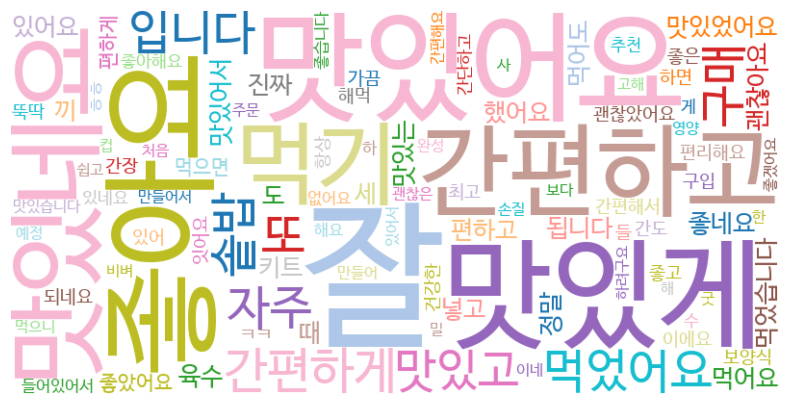

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NT550\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NT550\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


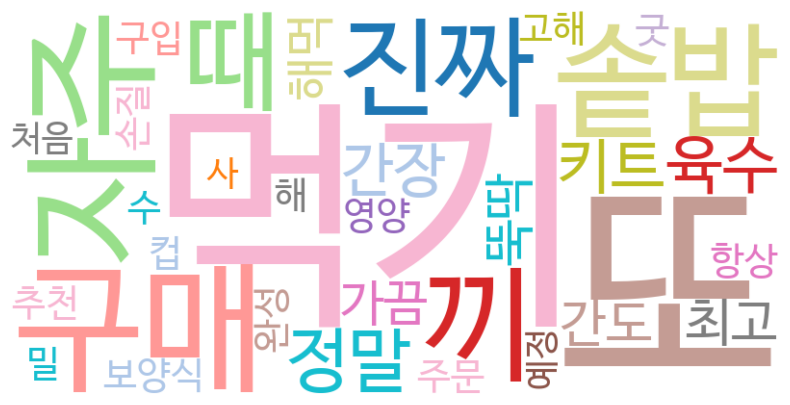

In [59]:
# 긍정 워드클라우드 시각화
plot_wordcloud(df_top100, '단어')

# 품사 중 명사만 끄집어내는 시각화
nouns = extract_nouns(df_top100, '단어')
nouns_df = pd.DataFrame(nouns, columns=['Noun'])
plot_wordcloud(nouns_df, 'Noun')

#### 부정 키워드 워드클라우드 

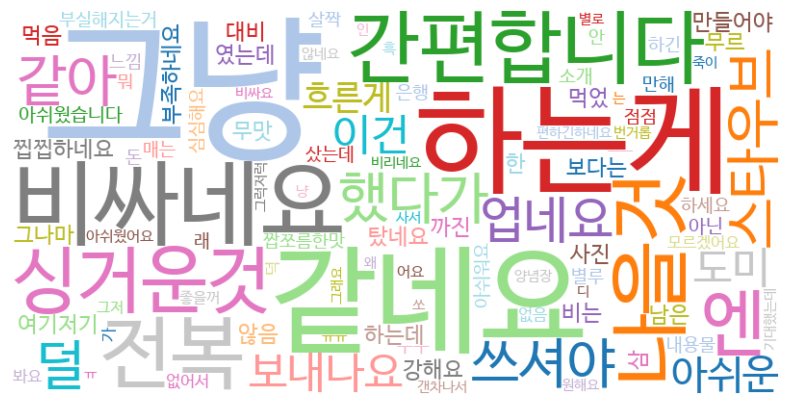

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NT550\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NT550\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


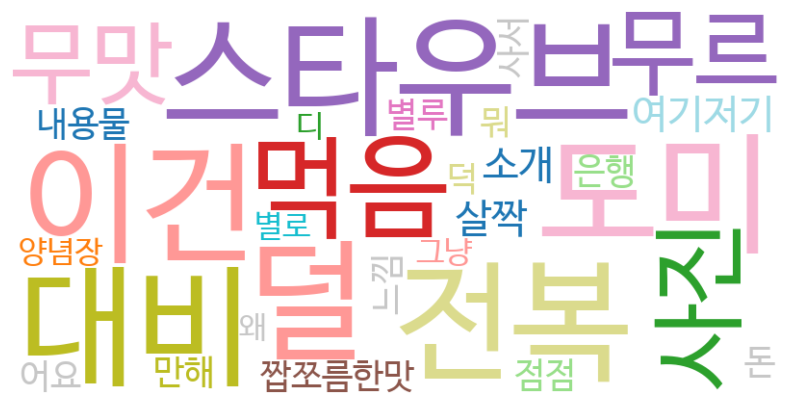

In [61]:
# 부정 워드클라우드 시각화
plot_wordcloud(df_bottom100, '단어')

# 품사 중 명사만 끄집어내는 시각화
nouns = extract_nouns(df_bottom100, '단어')
nouns_df = pd.DataFrame(nouns, columns=['Noun'])
plot_wordcloud(nouns_df, 'Noun')